In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


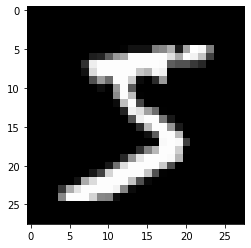

In [14]:
print(y_train[0])
plt.imshow(x_train[0].squeeze(), cmap='gray')

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.25
)
datagen.fit(x_train)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=15, activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=15, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=10, activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=10, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 15)        150       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 15)        2040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 10)        1360      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 10)          910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0

In [18]:
train_generator=datagen.flow(x_train, y_train, batch_size=64, subset='training')
val_generator = datagen.flow(x_train, y_train, batch_size=64, subset='validation')

history = model.fit_generator(train_generator, epochs=10, verbose=1, validation_data=val_generator)

C:\Users\LG\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
704/704 [==============================] - 37s 52ms/step - loss: 2.1842 - accuracy: 0.4403 - val_loss: 0.4058 - val_accuracy: 0.8743
Epoch 2/10
704/704 [==============================] - 38s 54ms/step - loss: 0.3420 - accuracy: 0.8920 - val_loss: 0.2550 - val_accuracy: 0.9205
Epoch 3/10
704/704 [==============================] - 36s 52ms/step - loss: 0.2211 - accuracy: 0.9322 - val_loss: 0.1806 - val_accuracy: 0.9431
Epoch 4/10
704/704 [==============================] - 36s 51ms/step - loss: 0.1780 - accuracy: 0.9464 - val_loss: 0.1605 - val_accuracy: 0.9501
Epoch 5/10
704/704 [==============================] - 36s 50ms/step - loss: 0.1505 - accuracy: 0.9537 - val_loss: 0.1556 - val_accuracy: 0.9506
Epoch 6/10
704/704 [==============================] - 36s 50ms/step - loss: 0.1377 - accuracy: 0.9572 - val_loss: 0.1206 - val_accuracy: 0.9616
Epoch 7/10
704/704 [==============================] - 35s 50ms/step - loss: 0.1239 - accuracy: 0.9631 - val_loss: 0.1351 - val_accuracy:

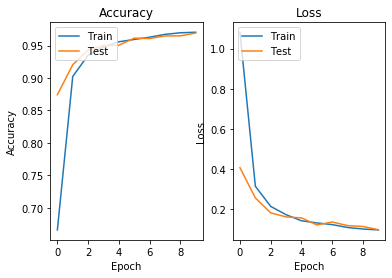

In [19]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['Train', 'Test'], loc='upper left')


plt.show()

In [ ]:
loss, accuracy = model.evaluat